In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from neural_networks_from_scratch.models.mlp import MLP
from neural_networks_from_scratch.training.loss_functions import mean_squared_error
from neural_networks_from_scratch.training.model_training import train_model

In [3]:
import random
random.seed(0)

In [4]:
n_features = 2
n_outputs = 1


x = [
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
    [0.0, 2.0],
    [2.0, 0.0],
    [2.0, 2.0],
]

y_true = [0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0]

grid_x, grid_y = np.mgrid[-10:10:200j, -10:10:200j]



In [5]:
x1_vals = np.arange(-10, 10, 0.1)
x2_vals = np.arange(-10, 10, 0.1)
a_mesh, b_mesh = np.meshgrid(x1_vals, x2_vals)
combinations = np.vstack([a_mesh.ravel(), b_mesh.ravel()]).T
data_df = pd.DataFrame(combinations, columns=["x1", "x2"])
data_df

,x1,x2
0,-10.0,-10.0
1,-9.9,-10.0
2,-9.8,-10.0
3,-9.7,-10.0
4,-9.6,-10.0
...,...,...
39995,9.5,9.9
39996,9.6,9.9
39997,9.7,9.9
39998,9.8,9.9


In [6]:
def run(train_steps, record_steps=None, plot=True):
    model = MLP(
        n_inputs=n_features,
        layers=(4, 4, n_outputs),
    )

    loss, train_df = train_model(
        model=model,
        x=x,
        y_true=y_true,
        train_steps=int(train_steps),
        record_steps=record_steps,
        learning_rate=1e-2,
        learning_rate_decay=0.5,
        loss_function=mean_squared_error,
        plot=plot,
    )
    plt.show()

    loss.set_track_gradients_full_network(False)
    data_df["y_pred"] = [y_.to_gvariable().val for y_ in model.forward(data_df[["x1", "x2"]].to_numpy().tolist())]

    grid_hue = griddata((data_df["x1"], data_df["x2"]), data_df["y_pred"], (grid_x, grid_y), method='cubic')

    plt.figure(figsize=(8, 6))
    contour = plt.contourf(grid_x, grid_y, grid_hue, levels=100, cmap="viridis")
    plt.colorbar(contour, label='y_pred')
    plt.xlabel("x1")
    plt.ylabel("x2")

/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


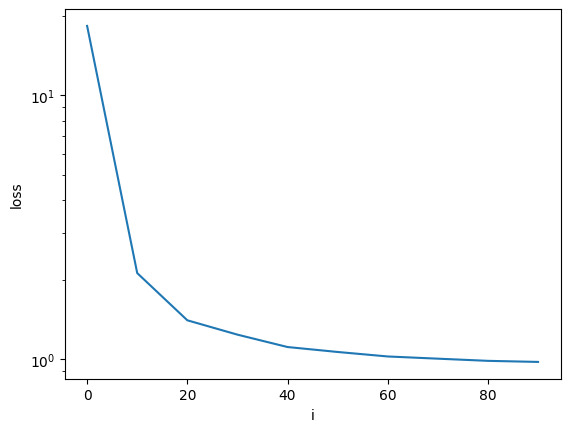

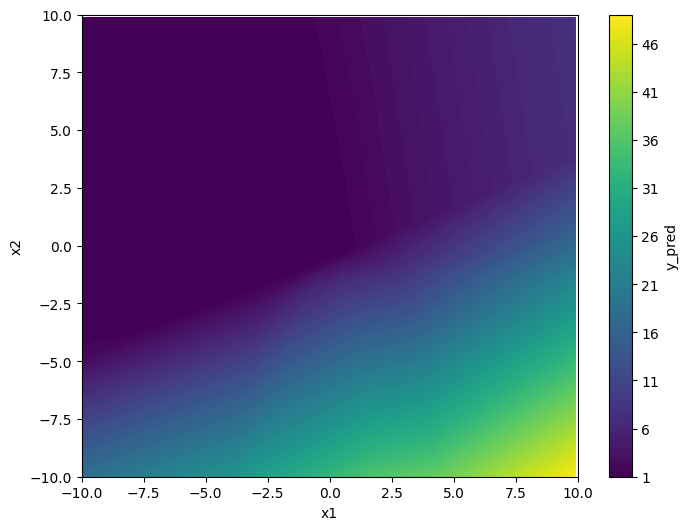

In [7]:
run(train_steps=100, record_steps=10, plot=True)

train_steps=100




train_steps=1000


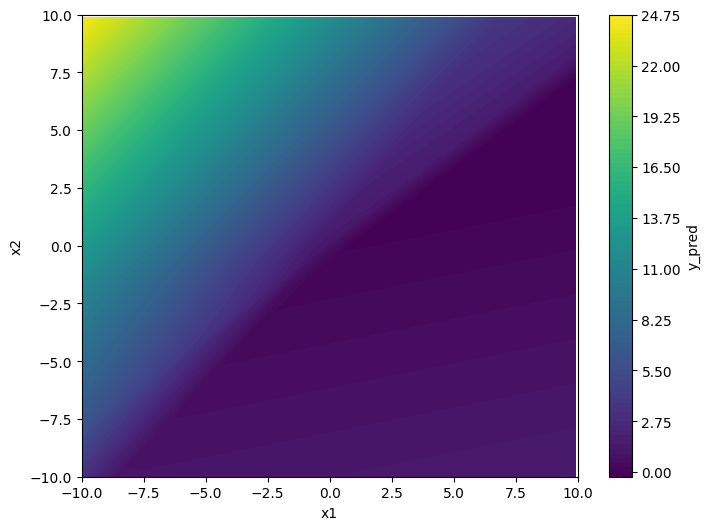





train_steps=10000.0


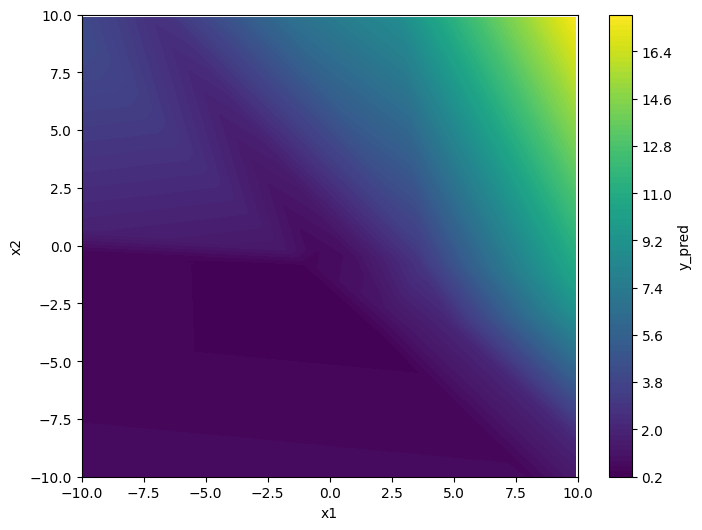





train_steps=100000.0


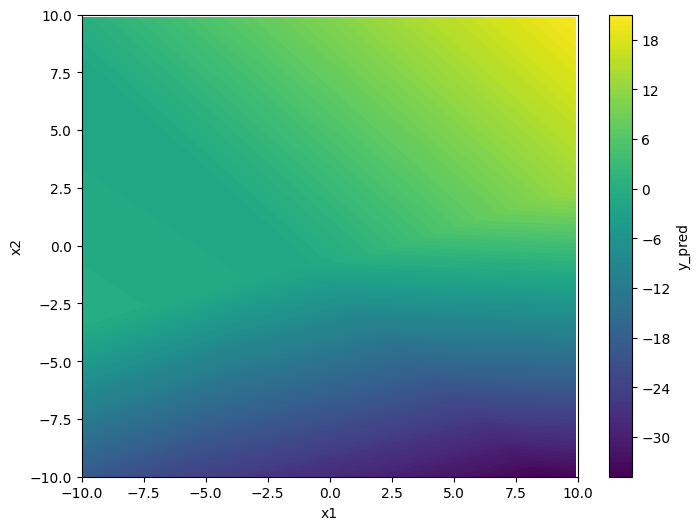

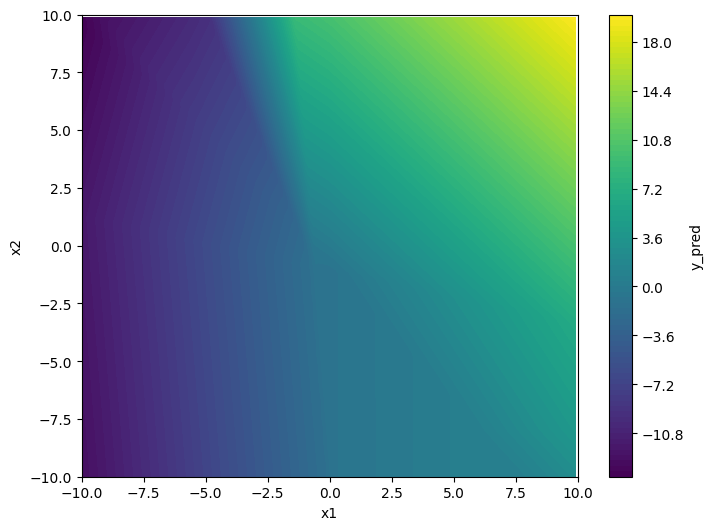

In [8]:
for train_steps in [100, 1000, 1e4, 1e5]:
    print(f"{train_steps=}")
    run(train_steps=train_steps, plot=False)
    print("\n\n\n")